# Marketlab Essentials - Montecarlo Simulation Usecase


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Marketlab-Essentials---Montecarlo-Simulation-Usecase" data-toc-modified-id="Marketlab-Essentials---Montecarlo-Simulation-Usecase-1">Marketlab Essentials - Montecarlo Simulation Usecase</a></span><ul class="toc-item"><li><span><a href="#Computing-$\pi$-(Pi)---Monte-Carlo-Simulation" data-toc-modified-id="Computing-$\pi$-(Pi)---Monte-Carlo-Simulation-1.1">Computing $\pi$ (Pi) - Monte Carlo Simulation</a></span><ul class="toc-item"><li><span><a href="#Monte-Carlo-Method" data-toc-modified-id="Monte-Carlo-Method-1.1.1">Monte Carlo Method</a></span></li><li><span><a href="#Uniform-Distribution" data-toc-modified-id="Uniform-Distribution-1.1.2">Uniform Distribution</a></span></li><li><span><a href="#Unit-Circle" data-toc-modified-id="Unit-Circle-1.1.3">Unit Circle</a></span></li></ul></li><li><span><a href="#Background" data-toc-modified-id="Background-1.2">Background</a></span></li><li><span><a href="#For-Loop-Approach" data-toc-modified-id="For-Loop-Approach-1.3">For Loop Approach</a></span></li><li><span><a href="#List-Comprehensions-Approach" data-toc-modified-id="List-Comprehensions-Approach-1.4">List Comprehensions Approach</a></span></li><li><span><a href="#Multiprocessing-Approach" data-toc-modified-id="Multiprocessing-Approach-1.5">Multiprocessing Approach</a></span></li></ul></li><li><span><a href="#Benchmarks" data-toc-modified-id="Benchmarks-2">Benchmarks</a></span><ul class="toc-item"><li><span><a href="#For-Loop-Execution-Time" data-toc-modified-id="For-Loop-Execution-Time-2.1">For Loop Execution Time</a></span></li><li><span><a href="#List-Comprehensions-Execution-Time" data-toc-modified-id="List-Comprehensions-Execution-Time-2.2">List Comprehensions Execution Time</a></span></li><li><span><a href="#Multiprocessing-Execution-Time" data-toc-modified-id="Multiprocessing-Execution-Time-2.3">Multiprocessing Execution Time</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3">Visualization</a></span></li></ul></div>

## Computing $\pi$ (Pi) - Monte Carlo Simulation

### Monte Carlo Method

https://en.wikipedia.org/wiki/Monte_Carlo_method

Monte Carlo methods (or Monte Carlo experiments) are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. 

Their essential idea is using randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. 

Monte Carlo methods are mainly used in three distinct problem classes: optimization, numerical integration, and generating draws from a probability distribution.

### Uniform Distribution

https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.random.uniform.html

![uniform-distribution](https://docs.scipy.org/doc/numpy-1.12.0/_images/numpy-random-uniform-1.png)

### Unit Circle

https://en.wikipedia.org/wiki/Unit_circle


![Unit-Circle](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Unit_circle_angles_color.svg/720px-Unit_circle_angles_color.svg.png)



## Background

Monte Carlo methods vary, but tend to follow a particular pattern:

1. Define a domain of possible inputs
2. Generate inputs randomly from a probability distribution over the domain
3. Perform a deterministic computation on the inputs
4. Aggregate the results

For example, consider a quadrant inscribed in a unit square. Given that the ratio of their areas is $\pi/4$ , the value of $\pi$ can be approximated using a Monte Carlo method:

1. Draw a square, then inscribe a quadrant within it
2. Uniformly scatter a given number of points over the square
3. Count the number of points inside the quadrant, i.e. having a distance from the origin of less than 1
4. The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas, $\pi/4$. Multiply the result by 4 to estimate $\pi$.

In this procedure the domain of inputs is the square that circumscribes the quadrant. We generate random inputs by scattering grains over the square then perform a computation on each input (test whether it falls within the quadrant). Aggregating the results yields our final result, the approximation of $\pi$.

There are two important points:

1. If the points are not uniformly distributed, then the approximation will be poor.
2. There are a large number of points. The approximation is generally poor if only a few points are randomly placed in the whole square. On average, the approximation improves as more points are placed.

Uses of Monte Carlo methods require large amounts of random numbers, and it was their use that spurred the development of pseudorandom number generators, which were far quicker to use than the tables of random numbers that had been previously used for statistical sampling.

In [1]:
import time
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt
from collections import Counter

## For Loop Approach

In [2]:
def __inside__():
    x = np.random.uniform(low=0.0, high=1.0)
    y = np.random.uniform(low=0.0, high=1.0)
    quadrant = x**2 + y**2
    return quadrant <= 1

def pi_for(N):
    inside_quadrant = 0.0
    for i in range(N):       
        quadrant = __inside__()
        if quadrant:
            inside_quadrant += 1.0            
    ratio = inside_quadrant/float(N)
    guess = 4.0 * ratio
    return guess

## List Comprehensions Approach

In [3]:
def __inside__():
    x = np.random.uniform(low=0.0, high=1.0)
    y = np.random.uniform(low=0.0, high=1.0)
    quadrant = x**2 + y**2
    return quadrant <= 1
    
def pi_list(N):
    inside = [ __inside__() for i in range(N)]
    cnt = Counter(inside)
    ratio = float(dict(cnt)[True])/float(N)
    guess = 4.0 * ratio
    return guess

## Multiprocessing Approach

In [4]:
def mp_inside(i):
    x = np.random.uniform(low=0.0, high=1.0)
    y = np.random.uniform(low=0.0, high=1.0)
    quadrant = x**2 + y**2
    return quadrant <= 1

def pi_mp(N):
    with mp.Pool() as pool:
        inside = pool.map(mp_inside, range(N))
    cnt = Counter(inside)
    ratio = float(dict(cnt)[True])/float(N)
    guess = 4.0 * ratio
    return guess

------

# Benchmarks

-----

In [5]:
num_iterations = 1000000

## For Loop Execution Time

In [6]:
%%time 
pi_for(N=num_iterations)

CPU times: user 1.44 s, sys: 5.07 ms, total: 1.45 s
Wall time: 1.45 s


3.1422

## List Comprehensions Execution Time

In [7]:
%%time
pi_list(N=num_iterations)

CPU times: user 1.47 s, sys: 12.7 ms, total: 1.48 s
Wall time: 1.47 s


3.14188

## Multiprocessing Execution Time

In [8]:
%%time
pi_mp(N=num_iterations)

CPU times: user 140 ms, sys: 38.7 ms, total: 179 ms
Wall time: 407 ms


3.136364

# Visualization

In [9]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D

In [10]:
def sim(N):
    data = {}
    inside_quadrant = 0.0
    data['x'] = []
    data['y'] = []
    data['color'] = []
    for n in range(N):
        x = np.random.uniform(low=0.0, high=1.0)
        y = np.random.uniform(low=0.0, high=1.0)
        quadrant = x**2 + y**2
        if quadrant <=1.0:
            inside_quadrant += 1.0
        data['x'].append(x)
        data['y'].append(y)
        data['color'].append('blue' if x**2 + y**2 < 1 else 'red')
    ratio = inside_quadrant/float(N)
    guess = 4.0 * ratio
    data['pi_guess'] = guess
    return data

In [26]:
data = sim(N=500)

In [27]:
data['x'][:5]

[0.8751589065493035,
 0.9323886027608389,
 0.2655780239244664,
 0.8749120130116688,
 0.2708809176474315]

In [28]:
data['y'][:5]

[0.9840314423769307,
 0.5845720298446005,
 0.10706688915111229,
 0.8280155111501276,
 0.11005762975708622]

In [29]:
data['color'][:5]

['red', 'red', 'blue', 'red', 'blue']

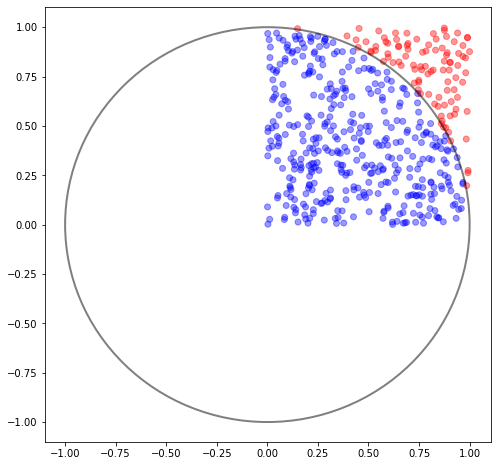

Estimate of Pi:3.216


In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
circle = Circle((0, 0), 1, facecolor='none', edgecolor=(0, 0, 0), linewidth=2, alpha=0.5)
ax.add_patch(circle)
plt.scatter(data['x'], data['y'],color=data['color'], alpha=0.4)
plt.show()

print("Estimate of Pi:" + str(data['pi_guess']))